In [19]:
# naive bayes algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris=pd.read_csv(r"C:\Users\KOWSIK\machine learning\heart 3.csv")
iris


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


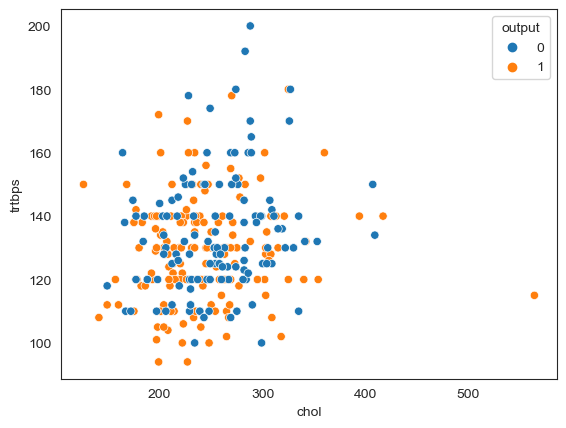

In [20]:
sns.set_style("white")
sns.scatterplot(data=iris,x="chol",y="trtbps",hue="output")
plt.show()

In [36]:
#sns.set_style("white")
#sns.pairplot(iris,hue="output",height=2)
#sns.pairplot(data=iris, x_vars="chol", y_vars="trtbps", hue="output")
#plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


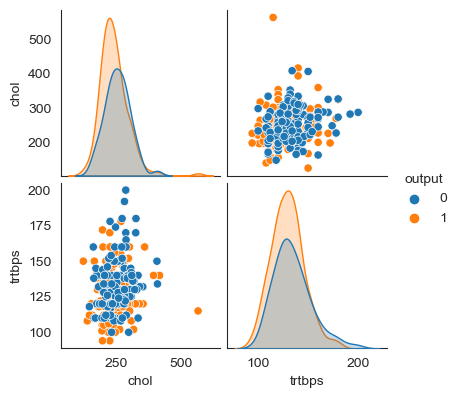

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.pairplot(iris, vars=["chol", "trtbps"], hue="output", height=2)

plt.show()


In [22]:
iris.columns=['age','sec','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']

col_names=list(iris.columns)
col_names

['age',
 'sec',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [23]:
# feature scaling - 1

X=col_names[0:13]  # size - (150,4)

y=col_names[13]    # size - (150,)

print(X)
print(y) 

#print(len(X))

['age', 'sec', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
output


In [24]:
# feature scaling -2 

from sklearn.model_selection import train_test_split # to control overfitting
train,test=train_test_split(iris,test_size=0.20,random_state=1)

print('training input samples:',len(train))
print('testing input samples:',len(test))
#print(test)

training input samples: 231
testing input samples: 58


In [25]:
# Guassian Naive Bayes

from sklearn.naive_bayes import GaussianNB # importation

Gmodel=GaussianNB() # invocation

In [26]:
Gmodel.fit(train[X],train[y])

train_Gpred=Gmodel.predict(train[X]) # train[x] - 120 training input samples

test_Gpred=Gmodel.predict(test[X]) # test[x] - 30 testing input samples


In [27]:
train_acc_gau = np.mean(train_Gpred==train[y])# 120 samples label(train)

test_acc_gau = np.mean(test_Gpred==test[y])# 30 samples label(test)

print('gaussian nb - training accuracy:',train_acc_gau*100,'%')
print('gaussian nb - testing accuracy:',test_acc_gau*100,'%')

gaussian nb - training accuracy: 84.84848484848484 %
gaussian nb - testing accuracy: 75.86206896551724 %


In [28]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
Mmodel.fit(train[X],train[y])

train_Mpred=Mmodel.predict(train[X])
test_Mpred=Mmodel.predict(test[X])

In [29]:
train_acc_multi=np.mean(train_Mpred==train[y])
test_acc_multi=np.mean(test_Mpred==test[y])
print('multinomial nb - training accuracy:',train_acc_multi*100,'%')
print('multinomial nb - testing accuracy:',test_acc_multi*100,'%')


multinomial nb - training accuracy: 77.48917748917748 %
multinomial nb - testing accuracy: 70.6896551724138 %


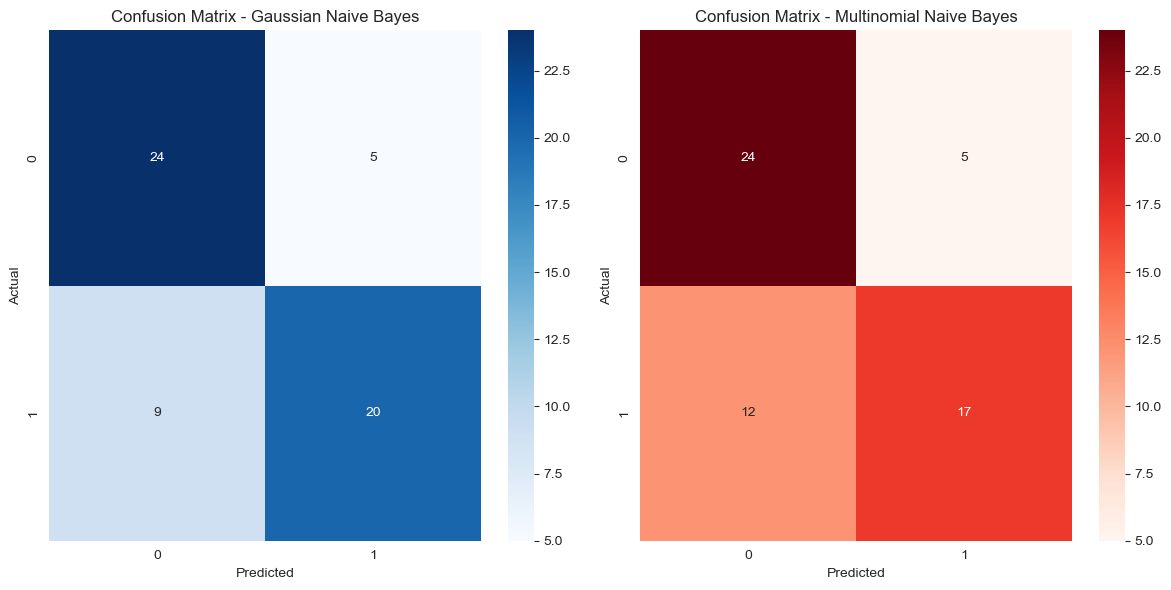

In [38]:
from sklearn.metrics import confusion_matrix
#gausian nb
conf_matrix_gau = confusion_matrix(test[y], test_Gpred)
# Multinomial nb
conf_matrix_multi = confusion_matrix(test[y], test_Mpred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gau, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_multi, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [9]:
# k nearest neighbor - knn
#--------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\KOWSIK\machine learning\heart 3.csv")

In [12]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


<Axes: xlabel='trtbps', ylabel='chol'>

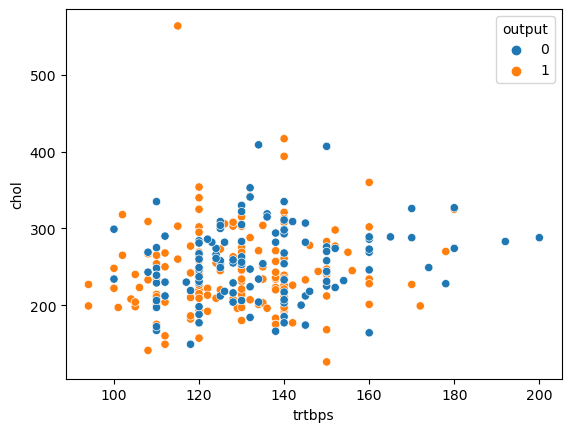

In [17]:
sns.scatterplot(data=df,x='trtbps',y='chol',hue='output')

(200.0, 300.0)

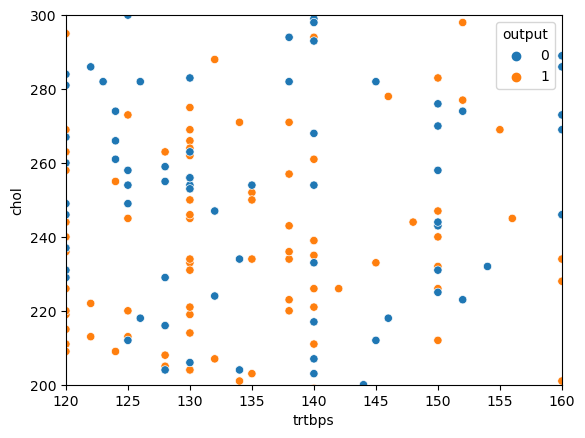

In [19]:
sns.scatterplot(data=df,x='trtbps',y='chol',hue='output')
plt.xlim(120,160)
plt.ylim(200,300)

In [20]:
# importing sklearn for model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
# feature scaling
X=df[['trtbps','chol']]
y = df['output']
print(X.shape)
print(y.shape)

(289, 2)
(289,)


In [138]:
# feature engineering
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print(X_train.shape)
print(y_train.shape)
print('first 10 training time samples')
print(X_train.head(10))

# here, X_train = training input sample
# X_test = testing input sample
# y_train = output cls label for training input samples
# y_test = output cls label for testing input samples

(216, 2)
(216,)
first 10 training time samples
     trtbps  chol
24      140   199
269     130   283
152     170   227
20      135   234
28      140   417
71       94   227
268     122   286
182     130   330
64      140   211
14      150   283


In [139]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(X_train[:5])
print('--------------------------')
print(scaled_X_train[:5])

     trtbps  chol
24      140   199
269     130   283
152     170   227
20      135   234
28      140   417
--------------------------
[[ 0.48783076 -0.96174018]
 [-0.09626815  0.61144895]
 [ 2.24012751 -0.43734381]
 [ 0.1957813  -0.30624471]
 [ 0.48783076  3.12106019]]


In [141]:
# knn classifier and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) # here n_neighbors is k 
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [142]:
#prediction
ypre = knn.predict(scaled_X_test)

In [143]:
# for classification report 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [144]:
confusion_matrix(y_test,ypre) # y_test = actual output ypre = predicted output

array([[16, 14],
       [13, 30]], dtype=int64)

In [145]:
len(y_test)

73

In [146]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54        30
           1       0.68      0.70      0.69        43

    accuracy                           0.63        73
   macro avg       0.62      0.62      0.62        73
weighted avg       0.63      0.63      0.63        73



In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test,ypre)

# output ends here itself
# ------------------------------------------
# the entire program completes it self here
#-------------------------------------------

0.6301369863013698

In [149]:
#error
t=1-accuracy_score(y_test,ypre)
t

0.36986301369863017

In [150]:
error_rate = []

# Will take some time
for i in range(1,11):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)
# print(error_rate)

Text(0, 0.5, 'Error Rate')

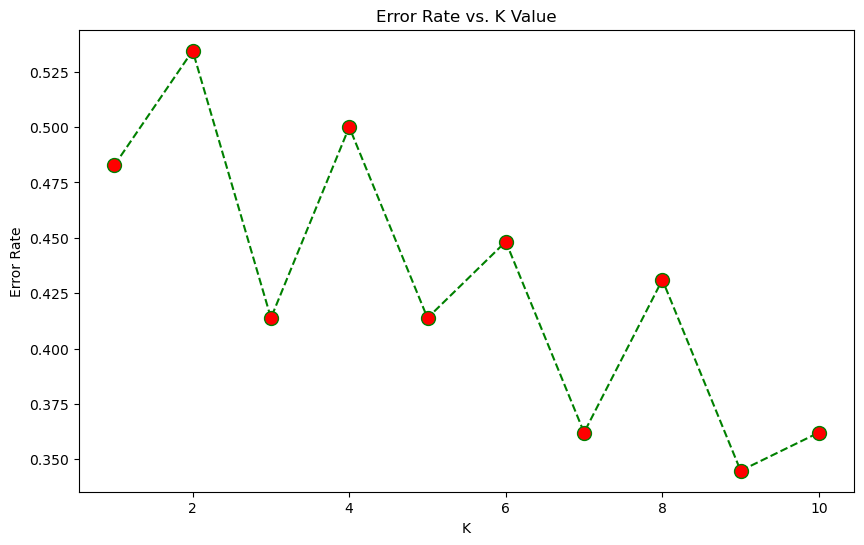

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')